## Social Network Analysis
#### Target : @infoJakarta
#### Word Keys : Vaksin or Covid
#### Time Before : 2020/08/01 - 2021/01/31
#### Time After : 2020/02/01 - now

- Import package yang digunakan untuk scrapping data tweet dari sebuah akun menggunakan ___twint___

In [1]:
import twint
import nest_asyncio
import pandas as pd
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

nest_asyncio.apply()

- Scrapping data tweet dari akun infoJakarta dengan kata kunci covid dan vaksin dan disimpang di file before.json 

### Before

In [2]:
c = twint.Config()
c.Username = 'infoJakarta'
c.Since = "2020-08-01" #batas awal tanggal pengambilan tweet
c.Until = "2021-01-31" #batas akhir tanggal pengambilan tweet
c.Count = True         
c.Retweets = True
c.Stats = True 
c.Show_hashtags = True
c.Hide_output = True
c.Profile_full = True
c.Store_json = True
for key in ['vaksin', 'covid']:
    c.Search = key
    c.Output = './infojakarta/before.json' # save to json
    twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 8 Tweets from @infoJakarta.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 12 Tweets from @infoJakarta.


### After

In [3]:
c = twint.Config()
c.Username = 'infoJakarta'
c.Since = "2021-02-01" #batas awal tanggal pengambilan tweet
c.Count = True         
c.Retweets = True
c.Stats = True 
c.Show_hashtags = True
c.Hide_output = True
c.Profile_full = True
c.Store_json = True
for key in ['vaksin', 'covid']:
    c.Search = key
    c.Output = './infojakarta/after.json' # save to json
    twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 8 Tweets from @infoJakarta.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 14 Tweets from @infoJakarta.


- Import package untuk scrapping menggunakan ___selenium___
- Mendefinisikan sebuah fungsi __get_list_replies__ dengan struktur:
    - Membuka link tweet yang didapat melalui ___twint___ sebelumnya 
    - Mengambil semua user yang me-reply dari tweet_id tersebut di dalam container tweet
    - Diambil dengan prefix string terdapat simbol '@' karena saat scrapping, tanggal tweet akan ikut terindikasi

In [2]:
from getpass import getpass
from time import sleep
from selenium.webdriver.common.keys import Keys
# from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
import numpy as np
from datetime import datetime, timedelta

In [20]:
chrome_options = webdriver.ChromeOptions()
prefs = {"profile.default_content_setting_values.notifications" : 2}
chrome_options.add_experimental_option("prefs",prefs)
# chrome_options.add_argument('headless') # untuk menutup browser

#specify the path to chromedriver.exe
driver = webdriver.Chrome('./chromedriver',chrome_options=chrome_options)

<ipython-input-20-4a1c4cd5d846>:7: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('./chromedriver',chrome_options=chrome_options)


In [21]:
driver.get('https://www.twitter.com/login')
sleep(2)

username = driver.find_element_by_xpath('//input[@name="session[username_or_email]"]')
username.send_keys('dyingrabbit_') # Ubah username sesuai akun pribadi

my_password = getpass()

password = driver.find_element_by_xpath('//input[@name="session[password]"]')
password.send_keys(my_password)
password.send_keys(Keys.RETURN)

········


In [18]:
fail_links = []
def get_list_replies(link):
    list_replies = []
    driver.get(link)
    sleep(2)
    
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    sleep(2)
    
    try:
        replies_container = driver.find_element_by_xpath('//div[@aria-label="Timeline: Conversation"]')
        if replies_container:
            replies = replies_container.find_elements_by_xpath('.//div[@dir="ltr"]/span')
            for reply in replies:
                if reply.text[0] == '@':
                    list_replies.append(reply.text)
                else:
                    continue
    except:
        print(list_replies)
        if not list_replies:
            fail_links.append(link)
        return list_replies
    print(list_replies)
    if not list_replies:
            fail_links.append(link)
    return list_replies

### SCRAPPING BEFORE DATA
- Load file yang telah disimpan dari twint, supaya program tidak harus berjalan dari awal lagi
- Mengambil beberapa kolom dengan informasi yang dibutuhkan saja kolom tersebut yaitu :
    - ['id', 'conversation_id', 'user_id', 'username', 'name','tweet','replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url','user_rt_id', 'user_rt', 'retweet_id', 'reply_to']
- Setelah itu dicheck apakah terdapat tweet yang sama yang tersimpan dari twint, jika ada maka akan di-drop salah satu

In [4]:
df_before = pd.read_json('./infojakarta/before.json' , lines = True)

In [5]:
# df_before.duplicated()
df_before = df_before[['id', 'conversation_id', 'user_id', 'username', 'name','tweet','replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url','user_rt_id', 'user_rt', 'retweet_id', 'reply_to']]

df_before = df_before.drop_duplicates(subset='link')
for i in df_before['link']:
    print(i)

https://twitter.com/infojakarta/status/1347527216444280834
https://twitter.com/infojakarta/status/1339812480646713346
https://twitter.com/infojakarta/status/1338462339717206017
https://twitter.com/infojakarta/status/1335764645575999491
https://twitter.com/infojakarta/status/1315506327037255686
https://twitter.com/infojakarta/status/1312597076631379968
https://twitter.com/infojakarta/status/1312594789531967488
https://twitter.com/infojakarta/status/1309744309516693516
https://twitter.com/infojakarta/status/1346683958440783873
https://twitter.com/infojakarta/status/1343594476862771200
https://twitter.com/infojakarta/status/1333619800669642754
https://twitter.com/infojakarta/status/1315498561568608257
https://twitter.com/infojakarta/status/1314716813431717890
https://twitter.com/infojakarta/status/1311665776277942273
https://twitter.com/infojakarta/status/1305856507427401728
https://twitter.com/infojakarta/status/1305726407155146752


In [9]:
data_tweets_before = df_before

- Iterasi row setiap row dari dataframe
- setelah itu menggunakan fungsi __get_list_replis__ yang telah didefinisikan dengan kolom __link__ pada setiap row
- hasil dari __get_list_replies__ dipush ke sebuah array kosong
- saat iterasi row selesai, maka array yang berisikan user yang reply pada setiap link tweet di assign ke dataframe dengan kolom __list_replies__
- setelah itu, karena scrapping menggunakan selenium memakan waktu yang panjang, supaya data dapat digunakan tanpa menjalankan __get_list_replies__, dataframe disimpan ke sebuah file __before_replies.json__

In [12]:
arr_temp = []
for i, row in data_tweets_before.iterrows():
     arr_temp.append(get_list_replies(row['link']))

data_tweets_before['list_replies'] = arr_temp
data_tweets_before['list_replies']

['@infojakarta', '@PutraWilson']
['@infojakarta']
['@edhsetia', '@cillresdy', '@ajfrm_', '@seokaim', '@riskawindayln', '@rahadianmunawir', '@chernobyl_9', '@aldinohendrwn', '@Wicaksono_sini', '@ketekniall', '@JAmsterdam7', '@RedV157', '@panikpanikk', '@Rizky_Gendon', '@spearmintybebe', '@Indah83015452', '@NovalSyawal', '@bangopang_', '@SirHarriss', '@SuryadiRahmat8', '@irfanharja', '@outtaanxiety', '@fourryilly', '@vickz____8910', '@kakiubanan', '@romadalimunthe', '@MuhammadLukman_', '@Desmonsaragi', '@adityawijaya', '@yusamhr', '@RDTNDR', '@sinyo_dimas', '@1nstantkarm4']
['@infojakarta', '@infojakarta', '@lyfes_hit', '@sikanseu', '@Rizky_Gendon', '@yusamhr']
['@Arie_16', '@teyeng37', '@Maxgirl13', '@babyoil008', '@christofer_bhp', '@rinihaphap', '@okkyjoeamstrong', '@Vinaagy', '@babangbetawie', '@Agus1892', '@WithOneWithYou', '@devicut', '@febri_aku', '@diiiaaannnP', '@Andreassgs', '@BintCeo', '@WibowoLukito', '@prasthialdrii', '@herry28290', '@MisterClown8', '@iamcakekhe']
['@infojak

0                          [@infojakarta, @PutraWilson]
1                                        [@infojakarta]
2     [@edhsetia, @cillresdy, @ajfrm_, @seokaim, @ri...
3     [@infojakarta, @infojakarta, @lyfes_hit, @sika...
4     [@Arie_16, @teyeng37, @Maxgirl13, @babyoil008,...
5     [@infojakarta, @astrannisaa, @Arie_16, @krishn...
6     [@infojakarta, @KompasTV, @Luthfi25283385, @ju...
7                             [@infojakarta, @dedeham_]
8     [@minie_centil, @cheflatarissa, @sanyseptian, ...
9     [@infojakarta, @eckaNh57, @vieniviedivieci, @k...
12    [@infojakarta, @infojakarta, @tukangnasiulam, ...
14    [@infojakarta, @ninanenen, @andinitiwie, @fara...
15    [@infojakarta, @KontanNews, @AisahNH15, @sabir...
17    [@infojakarta, @iqbalfarisy, @eru_joo_han, @e_...
18    [@infojakarta, @infojakarta, @siswandibambang,...
19    [@infojakarta, @augustbudyanto, @gadamasalah, ...
Name: list_replies, dtype: object

In [13]:
data_tweets_before.to_json('./infojakarta/before_replies.json')

- Load file __before_replies.json__
- Setelah itu, dari user - user yang reply pada kolom __list_replies__ digabungkan menjadi satu dan memilih yang masih belum ada di tweet sebelumnya
- Akan ada akun twitter besar yang akan terindikasi pada __list_replies__ karena tweet tersebut berasal dari retweet dari sebuah akun besar. 
- Dalam hal ini akan didrop supaya dapat mengetahui hanya dari user personal
- Akun besar tersebut antara lain __@KontanNews__ dan __@KomppasTV__

In [8]:
data_tweets_before = pd.read_json('./infojakarta/before_replies.json')
data_tweets_before

,id,conversation_id,user_id,username,name,tweet,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,user_rt_id,user_rt,retweet_id,reply_to,list_replies
0,1347527216444280834,1347527216444280832,106038219,infojakarta,@InfoJakarta,Vaksin Sinovac.. Halal. https://t.co/RSc3G6lRXr,3,6,17,[],[],https://twitter.com/infojakarta/status/1347527...,False,,,,,[],"[@infojakarta, @PutraWilson]"
1,1339812480646713346,1339812480646713344,106038219,infojakarta,@InfoJakarta,"Program vaksin gratis, estimasi anggaran yang ...",0,0,1,[],[],https://twitter.com/infojakarta/status/1339812...,False,,,,,[],[@infojakarta]
2,1338462339717206017,1338462339717206016,106038219,infojakarta,@InfoJakarta,Harga vaksin Covid-19. https://t.co/taKxMdi15q,81,323,611,[],[],https://twitter.com/infojakarta/status/1338462...,False,,,,,[],"[@edhsetia, @cillresdy, @ajfrm_, @seokaim, @ri..."
3,1335764645575999491,1335764645575999488,106038219,infojakarta,@InfoJakarta,"Breaking News. 1,2 Juta Vaksin Covid 19 sudah...",9,8,23,[],[],https://twitter.com/infojakarta/status/1335764...,False,,,,,[],"[@infojakarta, @infojakarta, @lyfes_hit, @sika..."
4,1315506327037255686,1315506327037255680,106038219,infojakarta,@InfoJakarta,Bye Covid ! Pemerintah memastikan program vak...,30,33,58,[],[],https://twitter.com/infojakarta/status/1315506...,False,,,,,[],"[@Arie_16, @teyeng37, @Maxgirl13, @babyoil008,..."
5,1312597076631379968,1312597076631379968,106038219,infojakarta,@InfoJakarta,Apa yang akan Anda lakukan apabila Vaksin Covi...,9,3,3,[infojakartapolling],[],https://twitter.com/infojakarta/status/1312597...,False,,,,,[],"[@infojakarta, @astrannisaa, @Arie_16, @krishn..."
6,1312594789531967488,1312594789531967488,106038219,infojakarta,@InfoJakarta,Tidak masalah apabila Vaksin Tidak Halal.,10,5,11,[],[],https://twitter.com/infojakarta/status/1312594...,False,https://twitter.com/KompasTV/status/1312218071...,,,,[],"[@infojakarta, @KompasTV, @Luthfi25283385, @ju..."
7,1309744309516693516,1309744309516693504,106038219,infojakarta,@InfoJakarta,Bertahan. Sampai vaksin tiba. #vaccinerace #CO...,2,36,25,"[vaccinerace, covidー19]",[],https://twitter.com/infojakarta/status/1309744...,False,,,,,[],"[@infojakarta, @dedeham_]"
8,1346683958440783873,1346683958440783872,106038219,infojakarta,@InfoJakarta,Kasus Covid terus meningkat. Perlukah PSBB ket...,54,2,45,[],[],https://twitter.com/infojakarta/status/1346683...,False,,,,,[],"[@minie_centil, @cheflatarissa, @sanyseptian, ..."
9,1343594476862771200,1343594476862771200,106038219,infojakarta,@InfoJakarta,"Muncul Varian Baru Covid 19, RI Tutup Akses Ma...",7,3,18,[],[],https://twitter.com/infojakarta/status/1343594...,False,,,,,[],"[@infojakarta, @eckaNh57, @vieniviedivieci, @k..."


In [51]:
arr = []
for i in data_tweets_before['list_replies']:
    for x in i:
        arr.append(x)
arr = list(set(arr))

prefix = '@'
arr = [i for i in arr if prefix in i]
arr = list(set(arr))
arr.remove('@infojakarta')
arr.remove('@KontanNews')
arr.remove('@KompasTV')
print(len(arr))
arr

136


['@AisahNH15',
 '@Riyo109',
 '@pinunggal',
 '@Maxgirl13',
 '@yusamhr',
 '@anakbawangputi',
 '@rahadianmunawir',
 '@chernobyl_9',
 '@juliaat__',
 '@BayuEpe',
 '@augustbudyanto',
 '@dedeham_',
 '@rinihaphap',
 '@PutraWilson',
 '@marselinarosali',
 '@trisurjadi',
 '@teyeng37',
 '@srasyh',
 '@krishnayana95',
 '@Agus1892',
 '@oka4denta',
 '@be_dull',
 '@adityawijaya',
 '@otozczyski',
 '@meuthiaariefia1',
 '@dwibbg',
 '@ketekniall',
 '@BintCeo',
 '@masDeep',
 '@lagabaib',
 '@bangopang_',
 '@lyfes_hit',
 '@cheflatarissa',
 '@siswandibambang',
 '@sinyo_dimas',
 '@andita711',
 '@spearmintybebe',
 '@Nanastasyaaa_',
 '@kiwcor3',
 '@KEBSIBEB',
 '@Rizky_Gendon',
 '@Septiaraenii',
 '@iamcakekhe',
 '@agskprmn',
 '@InsurgentArmy33',
 '@tukangnasiulam',
 '@andinitiwie',
 '@diiiaaannnP',
 '@Arfannn1',
 '@SuryadiRahmat8',
 '@Roy78356844',
 '@RDTNDR',
 '@christofer_bhp',
 '@MFP981',
 '@sanyseptian',
 '@NovalSyawal',
 '@FDL_Mamz',
 '@sabirsultan69',
 '@astrannisaa',
 '@doni_anakdario',
 '@febronie75',
 '@W

- Setelah mendapatkan user yang pernah reply scrapping menggunakan twint dengan konfigurasi seperti data __before__ 
- Scrapping dilakukan dalam for loop di setiap user yang telah didapat
- Dan melakukan hal yang sama seperti data __before__
- Output dari proses ini adalah __before_user_scrap.json__

In [10]:
filename = './infojakarta/before_user_data.json'
for uname in arr:
    uname = uname[1:]
    c = twint.Config()
    c.Username = uname
    c.Since = "2020-08-01" #batas awal tanggal pengambilan tweet
    c.Until = "2021-01-31" #batas akhir tanggal pengambilan tweet
    c.Search = "covid OR vaksin"
    c.Count = True         
    c.Retweets = True
    c.Stats = True 
    c.Show_hashtags = True
    c.Hide_output = True
    c.Profile_full = True
    c.Store_json = True
    c.Output = filename # save to json
    twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 4 Tweets from @AisahNH15.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 4 Tweets from @Riyo109.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @pinunggal.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @Maxgirl13.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 3 Tweets from @yusamhr.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 13 Tweets from @anakbawangputi.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @r

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 6 Tweets from @sabirsultan69.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 1 Tweets from @astrannisaa.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 1 Tweets from @doni_anakdario.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 4 Tweets from @febronie75.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 1 Tweets from @WithOneWithYou.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 14 Tweets from @Arie_16.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 2 

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @pais_hileud.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @devicut.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 1 Tweets from @MuhammadLukman_.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @nowritzki.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @cillresdy.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @sikanseu.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 2 Tweets from

In [11]:
before_user_data_tweets = pd.read_json('./infojakarta/before_user_data.json', lines = True)
before_user_data_tweets = before_user_data_tweets[['id', 'conversation_id', 'user_id', 'username', 'name','tweet','replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url','user_rt_id', 'user_rt', 'retweet_id', 'reply_to']]

before_user_data_tweets = before_user_data_tweets.drop_duplicates(subset='link')
for i in before_user_data_tweets['link']:
    print(i)

https://twitter.com/AisahNH15/status/1348821430465544193
https://twitter.com/AisahNH15/status/1335436336644247552
https://twitter.com/AisahNH15/status/1335435468570148865
https://twitter.com/AisahNH15/status/1296998962419834880
https://twitter.com/Riyo109/status/1337746517789007874
https://twitter.com/Riyo109/status/1333950253226082305
https://twitter.com/Riyo109/status/1327602075581120512
https://twitter.com/Riyo109/status/1311960983527587841
https://twitter.com/yusamhr/status/1346381274831671299
https://twitter.com/yusamhr/status/1321480969409363969
https://twitter.com/yusamhr/status/1312739322995437574
https://twitter.com/anakbawangputi/status/1353342381840502785
https://twitter.com/anakbawangputi/status/1349378543105441792
https://twitter.com/anakbawangputi/status/1344687528201183237
https://twitter.com/anakbawangputi/status/1335541227379290112
https://twitter.com/anakbawangputi/status/1335533551551279104
https://twitter.com/anakbawangputi/status/1327796125978357760
https://twitter

In [22]:
arr_temp = []
for i, row in before_user_data_tweets.iterrows():
     arr_temp.append(get_list_replies(row['link']))

before_user_data_tweets['list_replies'] = arr_temp
before_user_data_tweets['list_replies']

['@AisahNH15']
['@AisahNH15']
['@AisahNH15']
['@AisahNH15']
['@PRFMnews', '@Riyo109', '@AlamsyahWay']
['@Riyo109']
['@detikcom', '@Riyo109']
['@infojakarta', '@Riyo109']
['@jembutatasmulut', '@yusamhr', '@benhardimmanuel', '@bhatigol']
['@indosupporter', '@yusamhr']
['@benhardimmanuel', '@yusamhr', '@benhardimmanuel', '@yusamhr']
['@cinema21', '@anakbawangputi']
['@BisnisOnlineGue', '@anakbawangputi']
['@anakbawangputi', '@AffogatoCappuc1', '@anakbawangputi', '@matrasari', '@anakbawangputi']
['@anakbawangputi']
['@anakbawangputi']
['@artin_bayu', '@anakbawangputi', '@artin_bayu', '@anakbawangputi', '@artin_bayu']
['@ernestprakasa', '@rasabiruh', '@Renitha00161140', '@AddinHenny', '@anakbawangputi', '@AddinHenny', '@anakbawangputi', '@AddinHenny']
['@ernestprakasa', '@GoldenCatto365', '@anakbawangputi']
['@ernestprakasa', '@anakbawangputi']
['@Fahrihamzah', '@yudh4iko', '@anakbawangputi']
['@infojakarta', '@anakbawangputi']
['@anakbawangputi', '@yohanesvincent3', '@anakbawangputi', '@yo

['@infojakarta', '@RedV157', '@RedV157']
['@1nstantkarm4', '@vil_ooo', '@1nstantkarm4', '@cahturing', '@cahturing', '@1nstantkarm4', '@cahturing', '@1nstantkarm4', '@cahturing', '@1nstantkarm4', '@cahturing', '@cahturing', '@1nstantkarm4']
['@annaufal31', '@bambangsknt', '@1nstantkarm4', '@bambangsknt', '@1nstantkarm4']
['@1nstantkarm4', '@1nstantkarm4']
['@annaufal31', '@bambangsknt', '@1nstantkarm4', '@bambangsknt', '@1nstantkarm4']
['@1nstantkarm4', '@vil_ooo', '@1nstantkarm4', '@cahturing', '@cahturing', '@1nstantkarm4']
['@1nstantkarm4', '@vil_ooo', '@1nstantkarm4', '@cahturing', '@1nstantkarm4', '@cahturing', '@1nstantkarm4']
['@1nstantkarm4', '@MasIin28']
['@1nstantkarm4', '@Umifarid71', '@KemenkesRI']
['@1nstantkarm4', '@MasHary71', '@1nstantkarm4']
['@1nstantkarm4']
['@1nstantkarm4', '@1nstantkarm4', '@Umifarid71']
['@annaufal31', '@annaufal31', '@1nstantkarm4', '@JanuariAlex', '@1nstantkarm4', '@JanuariAlex', '@1nstantkarm4', '@mr_gr33n0']
['@1nstantkarm4', '@vil_ooo', '@1nst

['@boedi0n0', '@republikaonline']
['@falla_adinda', '@thanthrey', '@boedi0n0']
['@boedi0n0', '@VIVAcoid', '@pakSHW']
['@Desmonsaragi']
['@Desmonsaragi']
['@Desmonsaragi', '@diaryshelly', '@Desmonsaragi']
['@Desmonsaragi']
['@Desmonsaragi']
['@infojakarta', '@malaikatPencata']
['@PETERBOLOHO']
['@PETERBOLOHO']
['@Bandungfess', '@MuhammadLukman_']
['@okkyjoeamstrong']
['@katzen_jammer', '@Ameeranti', '@katzen_jammer', '@Ameeranti', '@Ameeranti', '@okkyjoeamstrong']
[]
[]
['@Andreassgs']
['@ajfrm_']
['@ajfrm_', '@ajfrm_']
['@ajfrm_', '@ajfrm_']
['@CNNIndonesia', '@noveliaadisty1', '@fikriqq', '@fikriqq', '@ajfrm_', '@fikriqq', '@fikriqq', '@KusumaRais']
[]
['@detikcom', '@febri_aku']
['@minie_centil', '@dirgarambe']
['@RadioElshinta', '@minie_centil']
['@aewin86', '@minie_centil']
[]
['@minie_centil']
['@larasadnyane', '@Zain_Fata', '@Dito_Khalibran']
['@eru_joo_han', '@hnurwahid']
['@eru_joo_han', '@susipudjiastuti']
['@eru_joo_han', '@ustadtengkuzul']
['@eru_joo_han', '@hakasasiid']


0                                      [@AisahNH15]
1                                      [@AisahNH15]
2                                      [@AisahNH15]
3                                      [@AisahNH15]
4               [@PRFMnews, @Riyo109, @AlamsyahWay]
                           ...                     
417    [@larasadnyane, @Zain_Fata, @Dito_Khalibran]
418                      [@eru_joo_han, @hnurwahid]
419                [@eru_joo_han, @susipudjiastuti]
420                 [@eru_joo_han, @ustadtengkuzul]
421                     [@eru_joo_han, @hakasasiid]
Name: list_replies, Length: 422, dtype: object

In [23]:
before_user_data_tweets.to_json('./infojakarta/before_user_scrap.json')

In [52]:
arr = []
for i in before_user_data_tweets['list_replies']:
    for x in i:
        arr.append(x)
arr = list(set(arr))

prefix = '@'
arr = [i for i in arr if prefix in i]
arr = list(set(arr))
# arr.remove('@infojakarta')
# arr.remove('@KontanNews')
# arr.remove('@KompasTV')
print(len(arr))
arr

385


['@A_ChristyJKT48',
 '@Betoktso',
 '@Reuters',
 '@alpokatmentega',
 '@yusamhr',
 '@eradotid',
 '@kh_notodiputro',
 '@rasabiruh',
 '@dedeham_',
 '@Anono80845565',
 '@namakubiya',
 '@srasyh',
 '@Ameeranti',
 '@AkbarDandhy',
 '@meuthiaariefia1',
 '@DickyxSatrio',
 '@svcka',
 '@siswandibambang',
 '@Yahoo_ID',
 '@RozadanS',
 '@Bilabilsz',
 '@AffogatoCappuc1',
 '@IM23fm',
 '@tirta_hudhi',
 '@iamcakekhe',
 '@komediangagal',
 '@sanca_fe',
 '@arifiantoyusma',
 '@TirtoID',
 '@ridhostwn',
 '@hitikaaa',
 '@medcom_id',
 '@EnterprisEJKT48',
 '@kegblgnunfaedh',
 '@IndonesiaGaruda',
 '@sanzensekaaii',
 '@markahdaftar',
 '@Sinfourth',
 '@doni_anakdario',
 '@IBChyd98',
 '@qronoz',
 '@RedV157',
 '@thowiee',
 '@gadamasalah',
 '@anthony_yanuar',
 '@retoeric',
 '@___rilwan',
 '@diaryshelly',
 '@Ditassr',
 '@Wicaksono_sini',
 '@_hendrasusanto',
 '@alby_amin',
 '@dwiatmokoooo',
 '@kurawa',
 '@namelessdera',
 '@dirgarambe',
 '@seokaim',
 '@MasIin28',
 '@dhani_dorayaki',
 '@JAmsterdam7',
 '@txtdrpemerintah',
 '

### SCRAPPING AFTER DATA

In [24]:
df_after = pd.read_json('./infojakarta/after.json' , lines = True)
df_after = df_after[['id', 'conversation_id', 'user_id', 'username', 'name','tweet','replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url','user_rt_id', 'user_rt', 'retweet_id', 'reply_to']]

df_after = df_after.drop_duplicates(subset='link')
for i in df_after['link']:
    print(i)

https://twitter.com/infojakarta/status/1384215782289141767
https://twitter.com/infojakarta/status/1376929493814677504
https://twitter.com/infojakarta/status/1376883129890205696
https://twitter.com/infojakarta/status/1373529155304706054
https://twitter.com/infojakarta/status/1372218371442319360
https://twitter.com/infojakarta/status/1372150088248664068
https://twitter.com/infojakarta/status/1371706352549040133
https://twitter.com/infojakarta/status/1366579485793939456
https://twitter.com/infojakarta/status/1388323748697182208
https://twitter.com/infojakarta/status/1375866713879703555
https://twitter.com/infojakarta/status/1372427544830435329
https://twitter.com/infojakarta/status/1372355655026106368
https://twitter.com/infojakarta/status/1372022857430011911
https://twitter.com/infojakarta/status/1367147465674158082
https://twitter.com/infojakarta/status/1366969561669464068
https://twitter.com/infojakarta/status/1366591065558450176
https://twitter.com/infojakarta/status/13665832287027281

In [25]:
data_tweets_after = df_after

In [26]:
arr_temp = []
for i, row in data_tweets_after.iterrows():
     arr_temp.append(get_list_replies(row['link']))

data_tweets_after['list_replies'] = arr_temp
data_tweets_after['list_replies']

['@infojakarta', '@dinkesJKT', '@eckaNh57']
['@infojakarta', '@DKIJakarta', '@melwth_', '@melanieppuchino']
['@liafrila', '@iamcakekhe', '@lutskay_', '@eriverde', '@herireh', '@ururleahciM', '@filterketengann', '@dont_sal', '@nesaa20', '@dedienpratama', '@wagesyahputra', '@ap_perdana', '@siswandibambang', '@nitayaanita', '@nofrizalwardoyo', '@Dyahwh', '@devicut', '@epanduu', '@imeldafebriane', '@ulancabiq']
['@infojakarta', '@DKIJakarta', '@chiko_jubilee']
['@infojakarta']
['@infojakarta']
['@infojakarta', '@detikcom']
['@infojakarta', '@sandiuno']
['@infojakarta', '@rifky_asr13', '@AndrianGeonk', '@Arie_16', '@okkyjoeamstrong']
['@infojakarta']
['@infojakarta']
['@infojakarta']
['@infojakarta', '@detikcom', '@infojakarta', '@AnditoAndy']
['@infojakarta', '@detikcom', '@gokamesa', '@eckaNh57', '@kokohbucin', '@Arie_16', '@glowtweets']
['@infojakarta']
['@infojakarta', '@infojakarta', '@infojakarta', '@infojakarta']
['@riesbow', '@bilonk', '@kompascom', '@masivian', '@fettcinocreamyy', 

0                 [@infojakarta, @dinkesJKT, @eckaNh57]
1     [@infojakarta, @DKIJakarta, @melwth_, @melanie...
2     [@liafrila, @iamcakekhe, @lutskay_, @eriverde,...
3           [@infojakarta, @DKIJakarta, @chiko_jubilee]
4                                        [@infojakarta]
5                                        [@infojakarta]
6                             [@infojakarta, @detikcom]
7                             [@infojakarta, @sandiuno]
8     [@infojakarta, @rifky_asr13, @AndrianGeonk, @A...
9                                        [@infojakarta]
11                                       [@infojakarta]
12                                       [@infojakarta]
13    [@infojakarta, @detikcom, @infojakarta, @Andit...
14    [@infojakarta, @detikcom, @gokamesa, @eckaNh57...
15                                       [@infojakarta]
16    [@infojakarta, @infojakarta, @infojakarta, @in...
17    [@riesbow, @bilonk, @kompascom, @masivian, @fe...
18                                       [@infoj

In [27]:
data_tweets_after.to_json('./infojakarta/after_replies.json')

In [28]:
data_tweets_after = pd.read_json('./infojakarta/after_replies.json')
data_tweets_after

,id,conversation_id,user_id,username,name,tweet,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,user_rt_id,user_rt,retweet_id,reply_to,list_replies
0,1384215782289141767,1384215782289141760,106038219,infojakarta,@InfoJakarta,Gratis vaksin non lansia ...? Kan memang vaks...,3,5,2,[],[],https://twitter.com/infojakarta/status/1384215...,False,https://twitter.com/dinkesJKT/status/138209661...,,,,[],"[@infojakarta, @dinkesJKT, @eckaNh57]"
1,1376929493814677504,1376929493814677504,106038219,infojakarta,@InfoJakarta,"Kurang lebihnya. Sembilan orang ditest, satu ...",3,0,1,[],[],https://twitter.com/infojakarta/status/1376929...,False,https://twitter.com/DKIJakarta/status/13768936...,,,,[],"[@infojakarta, @DKIJakarta, @melwth_, @melanie..."
2,1376883129890205696,1376883129890205696,106038219,infojakarta,@InfoJakarta,Kapan kira-kira kamu dapat vaksin?,32,1,13,[],[],https://twitter.com/infojakarta/status/1376883...,False,,,,,[],"[@liafrila, @iamcakekhe, @lutskay_, @eriverde,..."
3,1373529155304706054,1373529155304706048,106038219,infojakarta,@InfoJakarta,Kalau tidak salah baca datanya. Kemarin 20 ma...,2,4,5,[],[],https://twitter.com/infojakarta/status/1373529...,False,https://twitter.com/DKIJakarta/status/13732387...,,,,[],"[@infojakarta, @DKIJakarta, @chiko_jubilee]"
4,1372218371442319360,1372218371442319360,106038219,infojakarta,@InfoJakarta,Vaksin lansia di @UnikaAtmaJaya Terbuka untuk...,0,12,13,[],[],https://twitter.com/infojakarta/status/1372218...,False,,,,,[],[@infojakarta]
5,1372150088248664068,1372150088248664064,106038219,infojakarta,@InfoJakarta,Lansia dengan ktp daerah manapun bisa mendapat...,0,5,9,[],[],https://twitter.com/infojakarta/status/1372150...,False,,,,,[],[@infojakarta]
6,1371706352549040133,1371706352549040128,106038219,infojakarta,@InfoJakarta,"Pelaku industri pariwisata di Jakarta, apakah ...",0,0,3,[],[],https://twitter.com/infojakarta/status/1371706...,False,https://twitter.com/detikcom/status/1371701624...,,,,[],"[@infojakarta, @detikcom]"
7,1366579485793939456,1366579485793939456,106038219,infojakarta,@InfoJakarta,"Bergerak pararel. Vaksin jalan, pariwisata be...",0,1,2,[],[],https://twitter.com/infojakarta/status/1366579...,False,https://twitter.com/sandiuno/status/1366233283...,,,,[],"[@infojakarta, @sandiuno]"
8,1388323748697182208,1388323748697182208,106038219,infojakarta,@InfoJakarta,9000 orang pakai alat tes covid bekas. Stik an...,9,4,10,[],[],https://twitter.com/infojakarta/status/1388323...,False,,,,,[],"[@infojakarta, @rifky_asr13, @AndrianGeonk, @A..."
9,1375866713879703555,1375866713879703552,106038219,infojakarta,@InfoJakarta,"Larangan Mudik 2021 ""Perihal operasional perj...",0,2,4,[],[],https://twitter.com/infojakarta/status/1375866...,False,,,,,[],[@infojakarta]


In [53]:
arr = []
for i in data_tweets_after['list_replies']:
    for x in i:
        arr.append(x)
arr = list(set(arr))

prefix = '@'
arr = [i for i in arr if prefix in i]
arr = list(set(arr))
arr.remove('@infojakarta')
arr.remove('@detikcom')
arr.remove('@sandiuno')
arr.remove('@kompascom')
arr.remove('@RadioElshinta')
print(len(arr))
arr

50


['@dinkesJKT',
 '@dont_sal',
 '@DKIJakarta',
 '@gokamesa',
 '@riesbow',
 '@HerlambaRandy',
 '@HasratMuliadi',
 '@liafrila',
 '@dedienpratama',
 '@Arie_16',
 '@DonyYhudha',
 '@epanduu',
 '@rifky_asr13',
 '@herireh',
 '@siswandibambang',
 '@nofrizalwardoyo',
 '@fettcinocreamyy',
 '@agus_trimaulana',
 '@graciatbg',
 '@wagesyahputra',
 '@melanieppuchino',
 '@lutskay_',
 '@devicut',
 '@iamcakekhe',
 '@kokohbucin',
 '@septianprima',
 '@ap_perdana',
 '@Dyahwh',
 '@imeldafebriane',
 '@okkyjoeamstrong',
 '@zakyBE',
 '@oebunda',
 '@melwth_',
 '@nitayaanita',
 '@ulancabiq',
 '@filterketengann',
 '@sarahjoeri',
 '@eckaNh57',
 '@chiko_jubilee',
 '@AnditoAndy',
 '@bilonk',
 '@ruhiat_hilman',
 '@_banyulaut',
 '@masivian',
 '@eriverde',
 '@nesaa20',
 '@glowtweets',
 '@AndrianGeonk',
 '@eriesatrya',
 '@ururleahciM']

In [54]:
filename = './infojakarta/after_user_data.json'
for uname in arr:
    uname = uname[1:]
    c = twint.Config()
    c.Username = uname
    c.Since = "2021-02-01" #batas awal tanggal pengambilan tweet
#     c.Until = "2021-01-31" #batas akhir tanggal pengambilan tweet
    c.Search = "covid OR vaksin"
    c.Count = True         
    c.Retweets = True
    c.Stats = True 
    c.Show_hashtags = True
    c.Hide_output = True
    c.Profile_full = True
    c.Store_json = True
    c.Output = filename # save to json
    twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 18 Tweets from @dinkesJKT.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 1 Tweets from @dont_sal.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 103 Tweets from @DKIJakarta.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @gokamesa.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @riesbow.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets from @HerlambaRandy.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 2 Tweets from 

In [55]:
after_user_data_tweets = pd.read_json('./infojakarta/after_user_data.json', lines = True)
after_user_data_tweets = after_user_data_tweets[['id', 'conversation_id', 'user_id', 'username', 'name','tweet','replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url','user_rt_id', 'user_rt', 'retweet_id', 'reply_to']]

after_user_data_tweets = after_user_data_tweets.drop_duplicates(subset='link')
for i in after_user_data_tweets['link']:
    print(i)

https://twitter.com/dinkesJKT/status/1389223517628030982
https://twitter.com/dinkesJKT/status/1388770542598119425
https://twitter.com/dinkesJKT/status/1387351306210267136
https://twitter.com/dinkesJKT/status/1382096614895071233
https://twitter.com/dinkesJKT/status/1381794552793665542
https://twitter.com/dinkesJKT/status/1378986193443041281
https://twitter.com/dinkesJKT/status/1378155655949905920
https://twitter.com/dinkesJKT/status/1377823410387091457
https://twitter.com/dinkesJKT/status/1377566744181673986
https://twitter.com/dinkesJKT/status/1377204382886936584
https://twitter.com/dinkesJKT/status/1373202992946688003
https://twitter.com/dinkesJKT/status/1368778941805236225
https://twitter.com/dinkesJKT/status/1367842661462380544
https://twitter.com/dinkesJKT/status/1366891472952377347
https://twitter.com/dinkesJKT/status/1364928468937564162
https://twitter.com/dinkesJKT/status/1362346528766050304
https://twitter.com/dinkesJKT/status/1362343155115302921
https://twitter.com/dinkesJKT/s

In [56]:
arr_temp = []
for i, row in after_user_data_tweets.iterrows():
     arr_temp.append(get_list_replies(row['link']))

after_user_data_tweets['list_replies'] = arr_temp
after_user_data_tweets['list_replies']

['@dinkesJKT']
['@dinkesJKT']
['@dinkesJKT', '@maulana1976', '@Ike93306332']
['@dinkesJKT', '@mieke94447043', '@fantasidedi', '@mieke94447043', '@missflorenceli', '@bahasa_hanief', '@PecintaSrundeng']
['@dinkesJKT']
['@dinkesJKT', '@anaslyamardhia']
['@dinkesJKT', '@fantasidedi', '@anaslyamardhia', '@pringgaft', '@DessyKezia']
['@dinkesJKT']
['@dinkesJKT']
['@dinkesJKT']
['@dinkesJKT', '@rita_triasari']
['@dinkesJKT', '@Dhe_Besar']
['@dinkesJKT']
['@dinkesJKT', '@shoothegun23']
['@dinkesJKT', '@richard_sasamu']
['@dinkesJKT', '@bobykaa', '@fiiambitchious']
['@dinkesJKT']
['@dinkesJKT']
['@dont_sal', '@sudjiwotedjo']
['@DKIJakarta', '@DKIJakarta', '@AuntyeI', '@DKIJakarta']
['@DKIJakarta', '@putramatahari20']
['@DKIJakarta', '@DKIJakarta', '@satarman']
['@DKIJakarta']
['@DKIJakarta', '@rixunipr', '@DKIJakarta', '@Anakadam25', '@Cahyono_100']
['@gabyJKT48', '@rizkyrpg', '@Sofarsofan', '@DKIJakarta', '@Sofarsofan']
['@DKIJakarta']
['@marlina_idha', '@noormanfanni', '@DKIJakarta']
['@DKIJa

['@infojakarta', '@AndrianGeonk']
['@eriesatrya']
['@ururleahciM']
['@drjeromekim1', '@ururleahciM']


0                                           [@dinkesJKT]
1                                           [@dinkesJKT]
2               [@dinkesJKT, @maulana1976, @Ike93306332]
3      [@dinkesJKT, @mieke94447043, @fantasidedi, @mi...
4                                           [@dinkesJKT]
                             ...                        
203              [@sicupuh, @temponewsroom, @glowtweets]
204                        [@infojakarta, @AndrianGeonk]
205                                        [@eriesatrya]
206                                       [@ururleahciM]
207                        [@drjeromekim1, @ururleahciM]
Name: list_replies, Length: 208, dtype: object

In [57]:
after_user_data_tweets.to_json('./infojakarta/after_user_scrap.json')

In [58]:
after_user_data_tweets = pd.read_json('./infojakarta/after_user_scrap.json')
after_user_data_tweets.columns

Index(['id', 'conversation_id', 'user_id', 'username', 'name', 'tweet',
       'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'list_replies'],
      dtype='object')

In [59]:
arr = []
for i in after_user_data_tweets['list_replies']:
    for x in i:
        arr.append(x)
arr = list(set(arr))

prefix = '@'
arr = [i for i in arr if prefix in i]
arr = list(set(arr))
print(len(arr))
arr

202


['@nindyasetya',
 '@js_xoo',
 '@sicupuh',
 '@DonyYhudha',
 '@BSuwita',
 '@herireh',
 '@romdhananas',
 '@Selatanmonas',
 '@makLambeTurah',
 '@donut07115994',
 '@candyjkt',
 '@StufaG',
 '@fantasidedi',
 '@kopibubukhitam',
 '@marlina_idha',
 '@allienbumi',
 '@SrikandiTanggu1',
 '@sila_hendra',
 '@anaslyamardhia',
 '@moa_tampan',
 '@BungLaca',
 '@graciatbg',
 '@melanieppuchino',
 '@azharCloud',
 '@dwipurnomojati',
 '@akangaries',
 '@YasYelly',
 '@Paltiwest',
 '@Sofarsofan',
 '@agoest_st',
 '@iswantara_will',
 '@satarman',
 '@rhmtk_',
 '@Anisa41740905',
 '@AnakJak19180382',
 '@FerdinandHaean3',
 '@Cholid_Zen',
 '@FirzaHusain',
 '@TasKreseks',
 '@dfitriani1',
 '@kostumkomik',
 '@Wotanet',
 '@rahma_oma',
 '@bobykaa',
 '@AuntyeI',
 '@SantoAira',
 '@siapadahnih',
 '@PecintaSrundeng',
 '@eriesatrya',
 '@kafara666',
 '@dianaluvJC',
 '@ururleahciM',
 '@Budipriyo9',
 '@ursokind',
 '@gabyJKT48',
 '@mutajir_mohamat',
 '@VanJoel1975',
 '@andisaka16',
 '@siswandibambang',
 '@kikysaputrii',
 '@ayang_end

### VISUALIZING CLOSENES DEGREE

In [60]:
df_before = pd.read_json('./infojakarta/before_replies.json')
df_before.columns

Index(['id', 'conversation_id', 'user_id', 'username', 'name', 'tweet',
       'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'list_replies'],
      dtype='object')

In [61]:
before_scrap = pd.read_json('./infojakarta/before_user_scrap.json')
before_scrap.columns

Index(['id', 'conversation_id', 'user_id', 'username', 'name', 'tweet',
       'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'list_replies'],
      dtype='object')

In [62]:
before = pd.concat([df_before, before_scrap])
before = before.drop_duplicates(subset='link')
before

,id,conversation_id,user_id,username,name,tweet,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,user_rt_id,user_rt,retweet_id,reply_to,list_replies
0,1347527216444280834,1347527216444280832,106038219,infojakarta,@InfoJakarta,Vaksin Sinovac.. Halal. https://t.co/RSc3G6lRXr,3,6,17,[],[],https://twitter.com/infojakarta/status/1347527...,False,,,,,[],"[@infojakarta, @PutraWilson]"
1,1339812480646713346,1339812480646713344,106038219,infojakarta,@InfoJakarta,"Program vaksin gratis, estimasi anggaran yang ...",0,0,1,[],[],https://twitter.com/infojakarta/status/1339812...,False,,,,,[],[@infojakarta]
2,1338462339717206017,1338462339717206016,106038219,infojakarta,@InfoJakarta,Harga vaksin Covid-19. https://t.co/taKxMdi15q,81,323,611,[],[],https://twitter.com/infojakarta/status/1338462...,False,,,,,[],"[@edhsetia, @cillresdy, @ajfrm_, @seokaim, @ri..."
3,1335764645575999491,1335764645575999488,106038219,infojakarta,@InfoJakarta,"Breaking News. 1,2 Juta Vaksin Covid 19 sudah...",9,8,23,[],[],https://twitter.com/infojakarta/status/1335764...,False,,,,,[],"[@infojakarta, @infojakarta, @lyfes_hit, @sika..."
4,1315506327037255686,1315506327037255680,106038219,infojakarta,@InfoJakarta,Bye Covid ! Pemerintah memastikan program vak...,30,33,58,[],[],https://twitter.com/infojakarta/status/1315506...,False,,,,,[],"[@Arie_16, @teyeng37, @Maxgirl13, @babyoil008,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,1291248701210423296,1291151280396595200,4267701374,zain_fata,Zain Fata,@larasadnyane @CurhatKRL @CommuterLine Pengen ...,1,0,2,[],[],https://twitter.com/Zain_Fata/status/129124870...,False,,,,,"[{'screen_name': 'larasadnyane', 'name': 'sira...","[@larasadnyane, @Zain_Fata, @Dito_Khalibran]"
418,1339726295907725313,1339726295907725312,205083585,eru_joo_han,ayah yuta & azka,"Tidak untuk saya dan keluarga, vaksin gratis i...",0,0,0,[],[],https://twitter.com/eru_joo_han/status/1339726...,False,https://twitter.com/hnurwahid/status/133937326...,,,,[],"[@eru_joo_han, @hnurwahid]"
419,1339527742195335169,1339527742195335168,205083585,eru_joo_han,ayah yuta & azka,Tapi yang BPJS nya tidak menunggak.... Untung ...,0,0,0,[],[],https://twitter.com/eru_joo_han/status/1339527...,False,https://twitter.com/susipudjiastuti/status/133...,,,,[],"[@eru_joo_han, @susipudjiastuti]"
420,1337822539205120000,1337822539205120000,205083585,eru_joo_han,ayah yuta & azka,@KingSalman our habib rizieq shihab under arre...,0,1,0,[],[],https://twitter.com/eru_joo_han/status/1337822...,False,https://twitter.com/ustadtengkuzul/status/1337...,,,,[],"[@eru_joo_han, @ustadtengkuzul]"


In [64]:
for i,row in before.iterrows():
    if len(row['list_replies'])<3:
        before = before.drop(i)
    else:
        continue
        
before

,id,conversation_id,user_id,username,name,tweet,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,user_rt_id,user_rt,retweet_id,reply_to,list_replies
4,1315506327037255686,1315506327037255680,106038219,infojakarta,@InfoJakarta,Bye Covid ! Pemerintah memastikan program vak...,30,33,58,[],[],https://twitter.com/infojakarta/status/1315506...,False,,,,,[],"[@Arie_16, @teyeng37, @Maxgirl13, @babyoil008,..."
8,1346683958440783873,1346683958440783872,106038219,infojakarta,@InfoJakarta,Kasus Covid terus meningkat. Perlukah PSBB ket...,54,2,45,[],[],https://twitter.com/infojakarta/status/1346683...,False,,,,,[],"[@minie_centil, @cheflatarissa, @sanyseptian, ..."
17,1311665776277942273,1311665776277942272,106038219,infojakarta,@InfoJakarta,- Antivirus Covifor (remdesivir) untuk pasien ...,19,14,19,[],[],https://twitter.com/infojakarta/status/1311665...,False,,,,,[],"[@infojakarta, @iqbalfarisy, @eru_joo_han, @e_..."
18,1305856507427401728,1305856507427401728,106038219,infojakarta,@InfoJakarta,"Sekda DKI, Dr. Saefullah, M.Pd tengah dirawat ...",2,2,10,[covidjakarta],[],https://twitter.com/infojakarta/status/1305856...,False,,,,,[],"[@infojakarta, @infojakarta, @siswandibambang,..."
4,1337746517789007874,1337742012338999296,1181745607,riyo109,Riyo,@PRFMnews @rubiyanta83 Masalahnya masyarakat d...,1,0,0,[],[],https://twitter.com/Riyo109/status/13377465177...,False,,,,,"[{'screen_name': 'PRFMnews', 'name': 'Radio PR...","[@PRFMnews, @Riyo109, @AlamsyahWay]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,1293182213094170630,1293182213094170624,116704882,boedi0n0,Moh.Budiono Santoso,Kalau dipikir2 kenapa Pak Jokowi dan/atau kelu...,1,0,0,[],[],https://twitter.com/boedi0n0/status/1293182213...,False,https://twitter.com/VIVAcoid/status/1293162009...,,,,[],"[@boedi0n0, @VIVAcoid, @pakSHW]"
394,1328348430452756480,1328348430452756480,88634187,desmonsaragi,Desmon Saragi,Ini bung yesus kalo punya anak dan garis ketur...,1,0,0,[],[],https://twitter.com/Desmonsaragi/status/132834...,False,,,,,[],"[@Desmonsaragi, @diaryshelly, @Desmonsaragi]"
402,1345398030783008769,1345325925211095040,85762136,okkyjoeamstrong,Okky Joe Armstrong,@Ameeranti @katzenjammer89 Ya jelaslah WHO men...,0,0,1,[],[],https://twitter.com/okkyjoeamstrong/status/134...,False,,,,,"[{'screen_name': 'Ameeranti', 'name': '🍃🌸Ameer...","[@katzen_jammer, @Ameeranti, @katzen_jammer, @..."
409,1335464142522654724,1335381763862851584,1105082954567446529,ajfrm_,Aji Firmansyah,"@fikriqq @noveliaadisty1 @CNNIndonesia Covid ""...",1,0,0,[],[],https://twitter.com/ajfrm_/status/133546414252...,False,,,,,"[{'screen_name': 'fikriqq', 'name': 'fikri', '...","[@CNNIndonesia, @noveliaadisty1, @fikriqq, @fi..."


In [65]:
before = before.drop(before[before['username']=='kompastv'].sample(n=800).index)
before['username'].value_counts()

ValueError: a must be greater than 0 unless no samples are taken

In [89]:
import mpld3
def draw(G, pos, measures, measure_name, graph_name):
    fig, ax = plt.subplots(figsize=(20,20))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys(), ax=ax)
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
#     labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, ax=ax)
    
    labels = G.nodes()
    tooltip = mpld3.plugins.PointLabelTooltip(nodes, labels=labels)
    mpld3.plugins.connect(fig, tooltip)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.savefig(graph_name, format='png')
#     mpld3.show()
    plt.show()
    
def draw_noHeatMap(G, H):
    fig, ax = plt.subplots(figsize=(20,20))
    F = nx.compose(G,H)
    nodeG = []
    for node in G:
        nodeG.append(node)
    nodeH = []
    for node in H:
        nodeH.append(node)
    color_map = []    
    for node in F:
        if node in nodeG and node not in nodeH:
            color_map.append('Green')
        elif node in nodeH and node not in nodeG:
            color_map.append('Yellow')
        elif node in nodeH and node in nodeG:
            color_map.append('Red')
            
    nx.draw(F, pos=nx.spring_layout(F, k=0.05, iterations=20), node_size=250, cmap= plt.cm.plasma,
                          node_color=color_map, ax=ax)
    plt.show()

In [67]:
G = nx.Graph()
for i,row in before.iterrows():
    for rep in row['list_replies']:
        print(str.lower(row['username']), str.lower(rep[1:]))
        G.add_edge(str.lower(row['username']), str.lower(rep[1:]))

infojakarta arie_16
infojakarta teyeng37
infojakarta maxgirl13
infojakarta babyoil008
infojakarta christofer_bhp
infojakarta rinihaphap
infojakarta okkyjoeamstrong
infojakarta vinaagy
infojakarta babangbetawie
infojakarta agus1892
infojakarta withonewithyou
infojakarta devicut
infojakarta febri_aku
infojakarta diiiaaannnp
infojakarta andreassgs
infojakarta bintceo
infojakarta wibowolukito
infojakarta prasthialdrii
infojakarta herry28290
infojakarta misterclown8
infojakarta iamcakekhe
infojakarta minie_centil
infojakarta cheflatarissa
infojakarta sanyseptian
infojakarta srasyh
infojakarta separuhakuongol
infojakarta doni_anakdario
infojakarta ___rilwan
infojakarta kebsibeb
infojakarta mfp981
infojakarta gitc_seragam
infojakarta agskprmn
infojakarta meuthiaariefia1
infojakarta arfannn1
infojakarta febronie75
infojakarta bayuepe
infojakarta alegiggsy
infojakarta arie_16
infojakarta arie_16
infojakarta nanastasyaaa_
infojakarta jenengkuroi
infojakarta herry28290
infojakarta zain_fata
infoj

In [68]:
closenes = nx.closeness_centrality(G)
closenes = dict(sorted((value, key) for (key,value) in closenes.items())) 
closenes

{0.0: 'augustbudyanto',
 0.0031545741324921135: 'sirharriss',
 0.004206098843322818: 'tjatur_sutanto',
 0.0056782334384858045: 'nyit_2',
 0.006309148264984227: 'marselinarosali',
 0.008762705923589204: 'sammigismar',
 0.00946372239747634: 'yusamhr',
 0.0150306179254036: 'sayap_rindumu',
 0.015772870662460567: 'lambe_trah',
 0.028391167192429023: 'kakiubanan',
 0.030778412481882515: 'youchill34',
 0.05758208557337717: 'yourmocca',
 0.05915906832029731: 'zarryhendrik',
 0.05993690851735016: '1nstantkarm4',
 0.09948396631809037: 'tirta_hudhi',
 0.10178822737077524: 'svcka',
 0.10974561322386517: 'neroorlok',
 0.11095028515826544: 'noveliaadisty1',
 0.11356466876971609: 'ap_perdana',
 0.1167192429022082: 'ninanenen',
 0.12061540546441506: 'kiwcor3',
 0.12401927580267463: 'edhsetia',
 0.13603729445380863: 'rdtndr',
 0.13789319205890835: 'ajfrm_',
 0.1398004284635959: 'watchmenid',
 0.14648653591185481: 'gemaala',
 0.14691236886508696: 'satya_nirwikara',
 0.14734068480930002: 'selasapagi_',


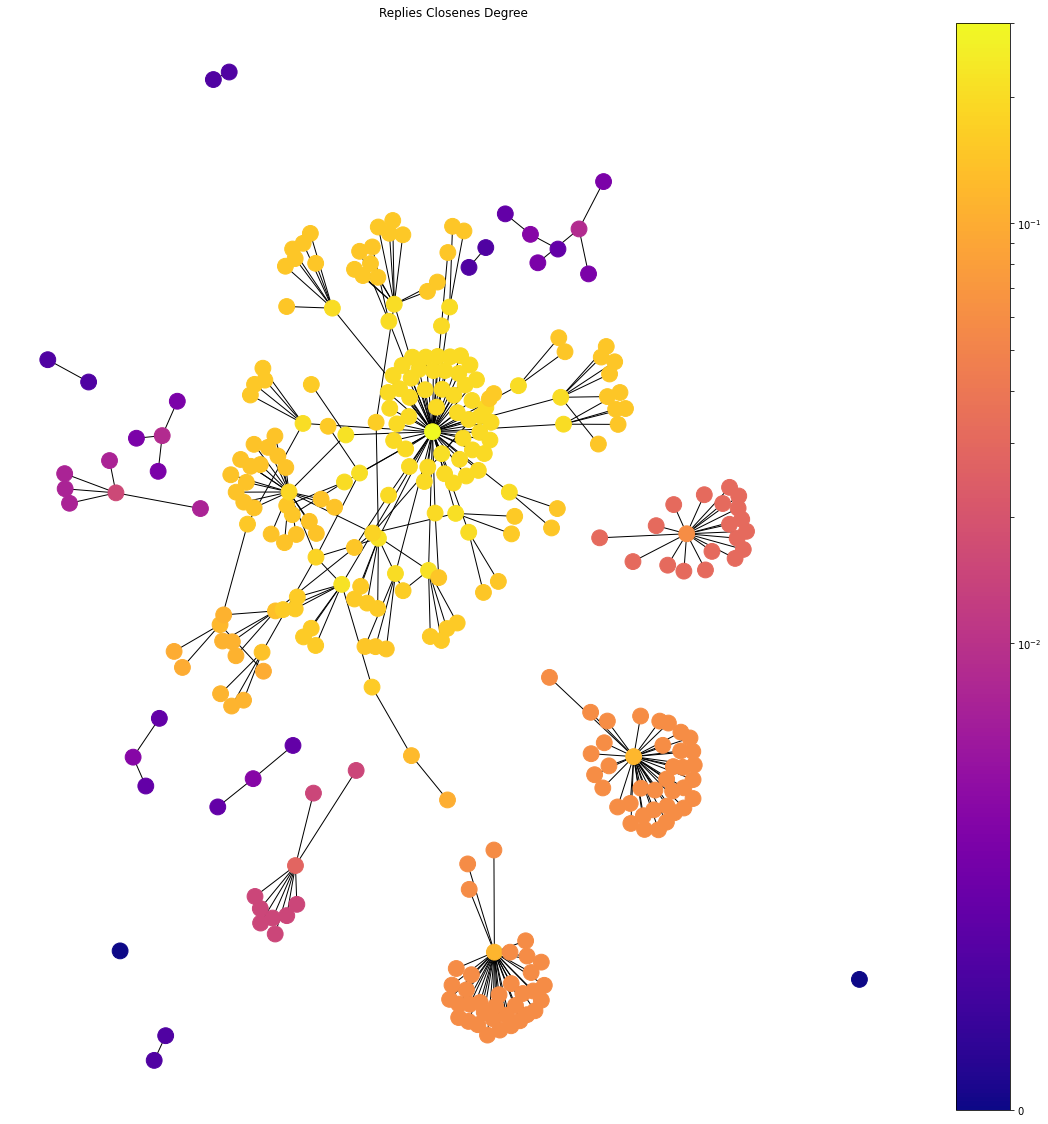

In [80]:
draw(G, nx.spring_layout(G, k=0.05, iterations=20), nx.closeness_centrality(G), 'Replies Closenes Degree', './infojakarta/before_replies.png')

In [70]:
df_after = pd.read_json('./infojakarta/after_replies.json')
after_scrap = pd.read_json('./infojakarta/after_user_scrap.json')

after = pd.concat([df_after, after_scrap])
after = after.drop_duplicates(subset='link')
after

,id,conversation_id,user_id,username,name,tweet,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,user_rt_id,user_rt,retweet_id,reply_to,list_replies
0,1384215782289141767,1384215782289141760,106038219,infojakarta,@InfoJakarta,Gratis vaksin non lansia ...? Kan memang vaks...,3,5,2,[],[],https://twitter.com/infojakarta/status/1384215...,False,https://twitter.com/dinkesJKT/status/138209661...,,,,[],"[@infojakarta, @dinkesJKT, @eckaNh57]"
1,1376929493814677504,1376929493814677504,106038219,infojakarta,@InfoJakarta,"Kurang lebihnya. Sembilan orang ditest, satu ...",3,0,1,[],[],https://twitter.com/infojakarta/status/1376929...,False,https://twitter.com/DKIJakarta/status/13768936...,,,,[],"[@infojakarta, @DKIJakarta, @melwth_, @melanie..."
2,1376883129890205696,1376883129890205696,106038219,infojakarta,@InfoJakarta,Kapan kira-kira kamu dapat vaksin?,32,1,13,[],[],https://twitter.com/infojakarta/status/1376883...,False,,,,,[],"[@liafrila, @iamcakekhe, @lutskay_, @eriverde,..."
3,1373529155304706054,1373529155304706048,106038219,infojakarta,@InfoJakarta,Kalau tidak salah baca datanya. Kemarin 20 ma...,2,4,5,[],[],https://twitter.com/infojakarta/status/1373529...,False,https://twitter.com/DKIJakarta/status/13732387...,,,,[],"[@infojakarta, @DKIJakarta, @chiko_jubilee]"
4,1372218371442319360,1372218371442319360,106038219,infojakarta,@InfoJakarta,Vaksin lansia di @UnikaAtmaJaya Terbuka untuk...,0,12,13,[],[],https://twitter.com/infojakarta/status/1372218...,False,,,,,[],[@infojakarta]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1373946472987717635,1373857822882983936,219186854,glowtweets,Glowzingga,@sicupuh Lah malah melakukan langkah haram dal...,0,0,0,[],[],https://twitter.com/glowtweets/status/13739464...,False,,,,,"[{'screen_name': 'sicupuh', 'name': 'azhar noo...","[@sicupuh, @temponewsroom, @glowtweets]"
204,1388325424858501126,1388323748697182208,419301517,andriangeonk,BabaGeonk,@infojakarta @KimiaFarmaCare Monitoring kelapa...,0,1,0,[],[],https://twitter.com/AndrianGeonk/status/138832...,False,,,,,"[{'screen_name': 'infojakarta', 'name': '@Info...","[@infojakarta, @AndrianGeonk]"
205,1382640780456595457,1382640780456595456,218383734,eriesatrya,Erie,"Ya Allah, hari ini tumben macet semacet macetn...",0,0,0,[],[],https://twitter.com/eriesatrya/status/13826407...,False,,,,,[],[@eriesatrya]
206,1366676788764581890,1366676788764581888,323320160,ururleahcim,kiddo,Selamat sore pak @ridwankamil ijin tanya pak u...,0,0,0,[],[],https://twitter.com/ururleahciM/status/1366676...,False,,,,,[],[@ururleahciM]


In [72]:
for i,row in after.iterrows():
    if len(row['list_replies'])<3:
        after = after.drop(i)
    else:
        continue
        
after

,id,conversation_id,user_id,username,name,tweet,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,user_rt_id,user_rt,retweet_id,reply_to,list_replies
2,1376883129890205696,1376883129890205696,106038219,infojakarta,@InfoJakarta,Kapan kira-kira kamu dapat vaksin?,32,1,13,[],[],https://twitter.com/infojakarta/status/1376883...,False,,,,,[],"[@liafrila, @iamcakekhe, @lutskay_, @eriverde,..."
3,1373529155304706054,1373529155304706048,106038219,infojakarta,@InfoJakarta,Kalau tidak salah baca datanya. Kemarin 20 ma...,2,4,5,[],[],https://twitter.com/infojakarta/status/1373529...,False,https://twitter.com/DKIJakarta/status/13732387...,,,,[],"[@infojakarta, @DKIJakarta, @chiko_jubilee]"
19,1359158015019126798,1359158015019126784,106038219,infojakarta,@InfoJakarta,Banyak yang pasang portal untuk mencegah masuk...,7,23,20,[],[],https://twitter.com/infojakarta/status/1359158...,False,,,,,[],"[@infojakarta, @graciatbg, @dont_sal, @Herlamb..."
21,1357534220663410689,1357533687886213120,106038219,infojakarta,@InfoJakarta,"Ge Nose, pendeteksi covid karya anak bangsa ya...",0,3,0,[],[],https://twitter.com/infojakarta/status/1357534...,False,,,,,[],"[@infojakarta, @RadioElshinta, @infojakarta]"
2,1387351306210267136,1387351306210267136,942558493604638720,dinkesjkt,Dinas Kesehatan Provinsi DKI Jakarta,Jakarta Memanggil! Pemerintah Provinsi DKI Ja...,7,3,1,[],[],https://twitter.com/dinkesJKT/status/138735130...,False,,,,,[],"[@dinkesJKT, @maulana1976, @Ike93306332]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1367500891113275399,1367498300576976896,515109536,melanieppuchino,si Hanih,@tirta_hudhi Mpe skrg tas ART-ku (dy nitip pes...,0,0,0,[],[],https://twitter.com/melanieppuchino/status/136...,False,,,,,"[{'screen_name': 'tirta_hudhi', 'name': 'DOKTE...","[@tirta_hudhi, @siapadahnih, @melanieppuchino]"
189,1387346848373907461,1387341432655024128,275457671,chiko_jubilee,chiko jubilee,@makLambeTurah Jd jelek deh nama kimia Farma. ...,0,0,0,[],[],https://twitter.com/chiko_jubilee/status/13873...,False,,,,,"[{'screen_name': 'makLambeTurah', 'name': 'mak...","[@makLambeTurah, @BungLaca, @chiko_jubilee]"
197,1373595879576276992,1373529155304706048,275457671,chiko_jubilee,chiko jubilee,@infojakarta @DKIJakarta Semoga mudik di tangg...,0,0,0,[],[],https://twitter.com/chiko_jubilee/status/13735...,False,,,,,"[{'screen_name': 'infojakarta', 'name': '@Info...","[@infojakarta, @DKIJakarta, @chiko_jubilee]"
199,1365047640036007936,1364808912537612288,275457671,chiko_jubilee,chiko jubilee,@MallikaMumm @detikcom Sama mbak. Sembuh covid...,2,0,0,[],[],https://twitter.com/chiko_jubilee/status/13650...,False,,,,,"[{'screen_name': 'MallikaMumm', 'name': 'Rena ...","[@detikcom, @chiko_jubilee, @chiko_jubilee]"


In [73]:
# before = before.drop(before[before['username']=='kompastv'].sample(n=800).index)
after['username'].value_counts()

dkijakarta         41
melanieppuchino     7
infojakarta         4
nofrizalwardoyo     3
chiko_jubilee       3
dinkesjkt           2
arie_16             2
rifky_asr13         1
glowtweets          1
herireh             1
liafrila            1
siswandibambang     1
hasratmuliadi       1
Name: username, dtype: int64

In [74]:
H = nx.Graph()
for i,row in after.iterrows():
    for rep in row['list_replies']:
        print(str.lower(row['username']), str.lower(rep[1:]))
        H.add_edge(str.lower(row['username']), str.lower(rep[1:]))

infojakarta liafrila
infojakarta iamcakekhe
infojakarta lutskay_
infojakarta eriverde
infojakarta herireh
infojakarta ururleahcim
infojakarta filterketengann
infojakarta dont_sal
infojakarta nesaa20
infojakarta dedienpratama
infojakarta wagesyahputra
infojakarta ap_perdana
infojakarta siswandibambang
infojakarta nitayaanita
infojakarta nofrizalwardoyo
infojakarta dyahwh
infojakarta devicut
infojakarta epanduu
infojakarta imeldafebriane
infojakarta ulancabiq
infojakarta infojakarta
infojakarta dkijakarta
infojakarta chiko_jubilee
infojakarta infojakarta
infojakarta graciatbg
infojakarta dont_sal
infojakarta herlambarandy
infojakarta ruhiat_hilman
infojakarta agus_trimaulana
infojakarta hasratmuliadi
infojakarta infojakarta
infojakarta radioelshinta
infojakarta infojakarta
dinkesjkt dinkesjkt
dinkesjkt maulana1976
dinkesjkt ike93306332
dinkesjkt dinkesjkt
dinkesjkt mieke94447043
dinkesjkt fantasidedi
dinkesjkt mieke94447043
dinkesjkt missflorenceli
dinkesjkt bahasa_hanief
dinkesjkt pecin

In [75]:
closenes = nx.closeness_centrality(H)
closenes = dict(sorted((value, key) for (key,value) in closenes.items())) 
closenes

{0.006172839506172839: 'triadibagus',
 0.008230452674897118: 'temponewsroom',
 0.01111111111111111: 'wariman_',
 0.012345679012345678: 'glowtweets',
 0.018518518518518517: 'arie_16',
 0.02633744855967078: 'znovietha22',
 0.04938271604938271: 'melanieppuchino',
 0.2122719734660033: 'pecintasrundeng',
 0.23063063063063063: 'rhmtk_',
 0.2782608695652174: 'dinkesjkt',
 0.2807017543859649: 'veghievenus',
 0.2831858407079646: 'maklambeturah',
 0.28959276018099545: 'riyan_bray',
 0.30769230769230765: 'wagesyahputra',
 0.3106796116504854: 'liafrila',
 0.37317784256559766: 'yudin80',
 0.3890577507598784: 'maulana1976',
 0.4063492063492063: 'siswandibambang',
 0.40894568690095845: 'hasratmuliadi',
 0.4142394822006472: 'chiko_jubilee',
 0.4280936454849498: 'nofrizalwardoyo',
 0.46886446886446886: 'infojakarta',
 0.6399999999999999: 'dkijakarta'}

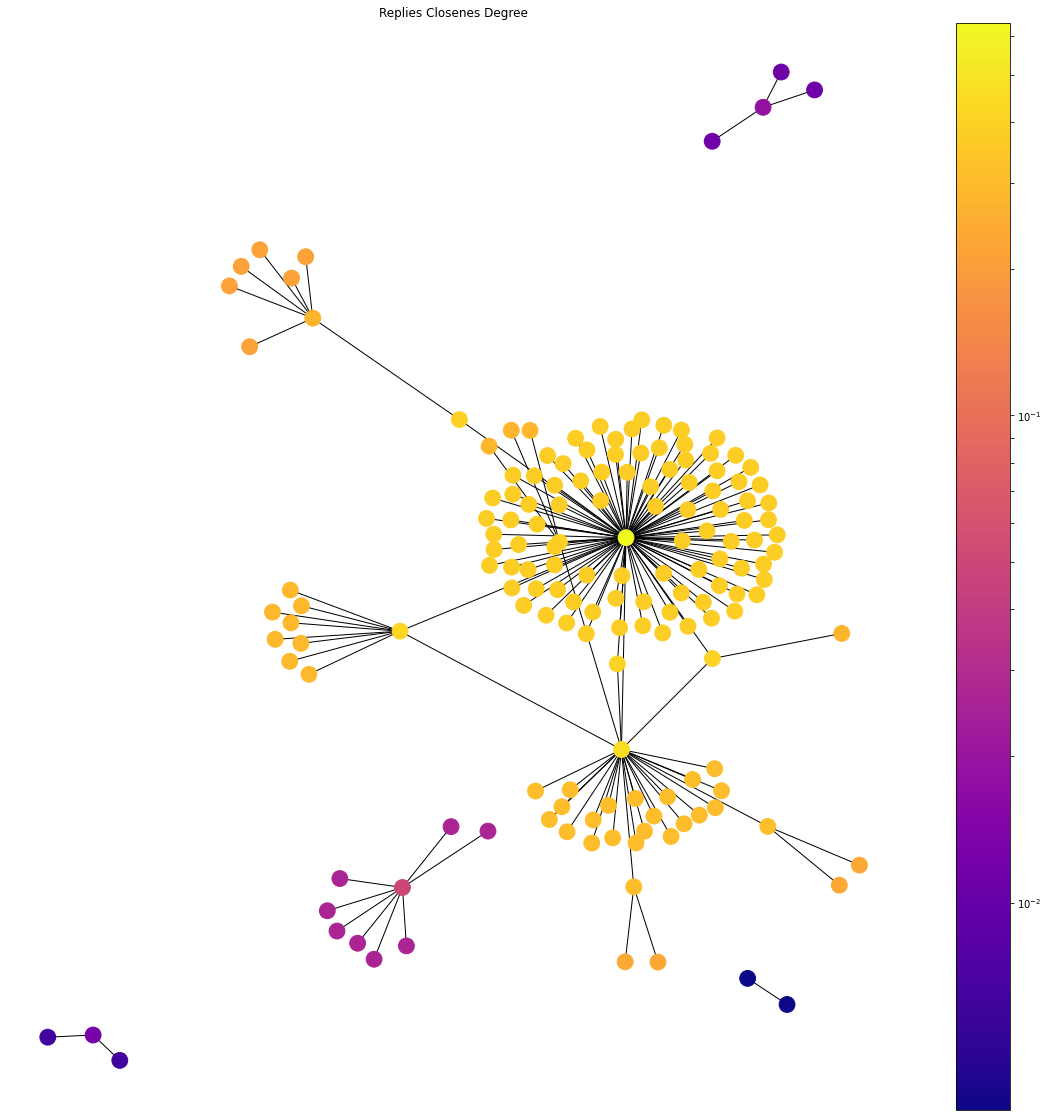

In [76]:
draw(H, nx.spring_layout(H, k=0.05, iterations=20), nx.closeness_centrality(H), 'Replies Closenes Degree', './infojakarta/after_replies.png')

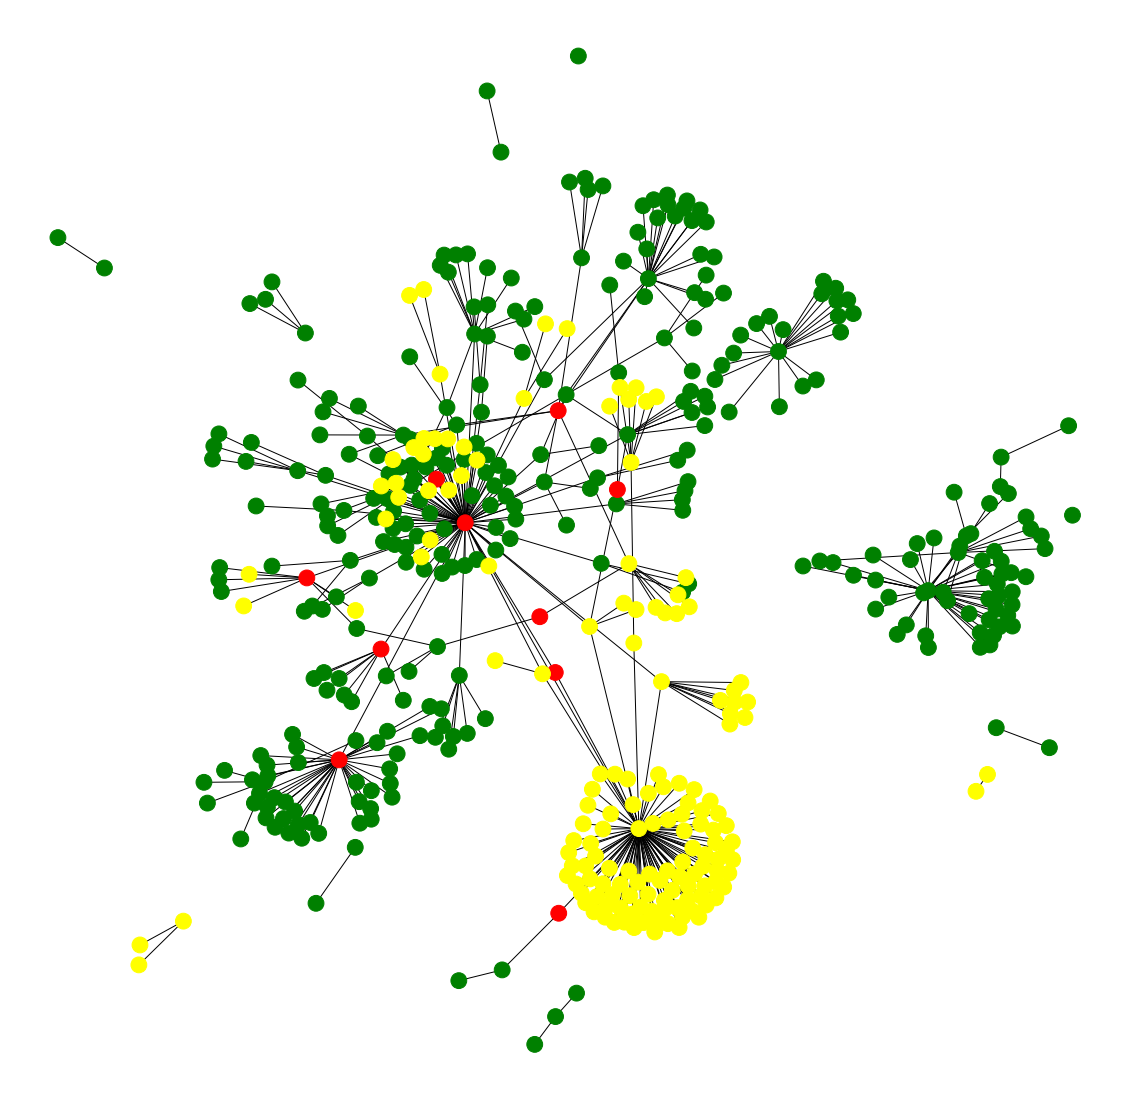

In [90]:
F = nx.compose(G,H)
draw_noHeatMap(G,H)

{'infojakarta': 95, 'arie_16': 11, 'teyeng37': 1, 'maxgirl13': 1, 'babyoil008': 7, 'christofer_bhp': 11, 'rinihaphap': 1, 'okkyjoeamstrong': 5, 'vinaagy': 1, 'babangbetawie': 1, 'agus1892': 1, 'withonewithyou': 6, 'devicut': 1, 'febri_aku': 1, 'diiiaaannnp': 1, 'andreassgs': 1, 'bintceo': 1, 'wibowolukito': 1, 'prasthialdrii': 1, 'herry28290': 1, 'misterclown8': 1, 'iamcakekhe': 10, 'minie_centil': 1, 'cheflatarissa': 5, 'sanyseptian': 4, 'srasyh': 1, 'separuhakuongol': 1, 'doni_anakdario': 1, '___rilwan': 5, 'kebsibeb': 1, 'mfp981': 1, 'gitc_seragam': 1, 'agskprmn': 5, 'meuthiaariefia1': 6, 'arfannn1': 6, 'febronie75': 1, 'bayuepe': 1, 'alegiggsy': 9, 'nanastasyaaa_': 4, 'jenengkuroi': 1, 'zain_fata': 5, 'malaikatpencata': 1, 'juulaikhasahara': 1, 'oka4denta': 1, 'fourryilly': 4, 'sabirsultan69': 5, 'lingga_pv': 1, 'nowritzki': 1, 'fhandie_hr': 1, 'boedi0n0': 9, 'anakbawangputi': 14, 'pinunggal': 1, 'iqbalfarisy': 1, 'eru_joo_han': 1, 'e_gabagus': 1, 'peterboloho': 1, 'dwibbg': 1, 'pa

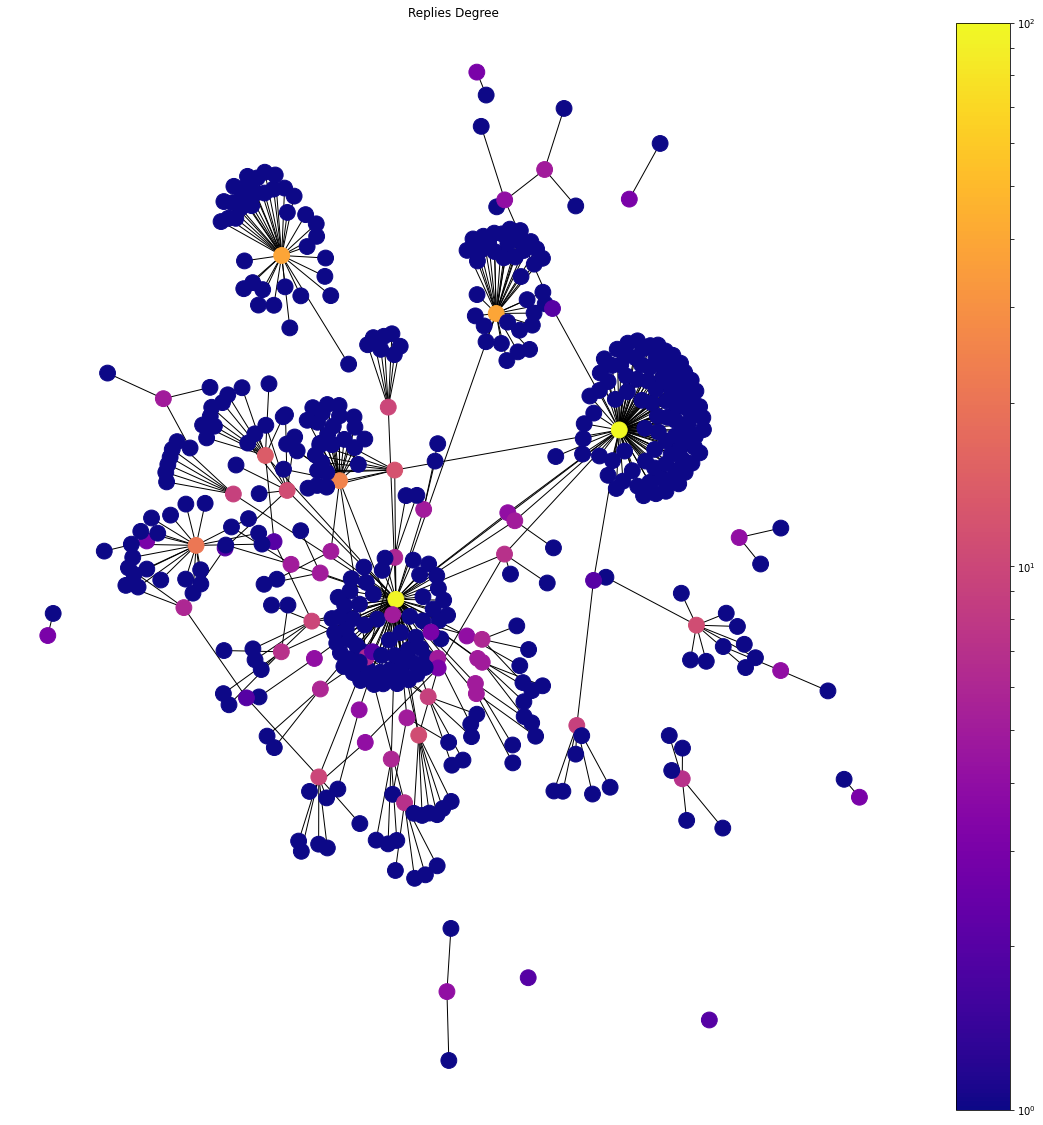

In [121]:
key = [node for (node, val) in F.degree()]
value = [val for (node, val) in F.degree()]
deg = dict(zip(key,value))
print(deg)
draw(F, nx.spring_layout(F, k=0.05, iterations=20), 
     deg, 'Replies Degree', './infojakarta/replies_deg.png')

{'infojakarta': 0.40024069891834063, 'arie_16': 0.270862325543981, 'teyeng37': 0.26485428874818107, 'maxgirl13': 0.26485428874818107, 'babyoil008': 0.26682713261222707, 'christofer_bhp': 0.27741756091532616, 'rinihaphap': 0.26485428874818107, 'okkyjoeamstrong': 0.2658370504875064, 'vinaagy': 0.26485428874818107, 'babangbetawie': 0.26485428874818107, 'agus1892': 0.26485428874818107, 'withonewithyou': 0.27849595765357815, 'devicut': 0.26485428874818107, 'febri_aku': 0.26485428874818107, 'diiiaaannnp': 0.26485428874818107, 'andreassgs': 0.26485428874818107, 'bintceo': 0.26485428874818107, 'wibowolukito': 0.26485428874818107, 'prasthialdrii': 0.26485428874818107, 'herry28290': 0.26485428874818107, 'misterclown8': 0.26485428874818107, 'iamcakekhe': 0.26832616144712723, 'minie_centil': 0.26485428874818107, 'cheflatarissa': 0.2658370504875064, 'sanyseptian': 0.26534475965327026, 'srasyh': 0.26485428874818107, 'separuhakuongol': 0.26485428874818107, 'doni_anakdario': 0.26485428874818107, '___r

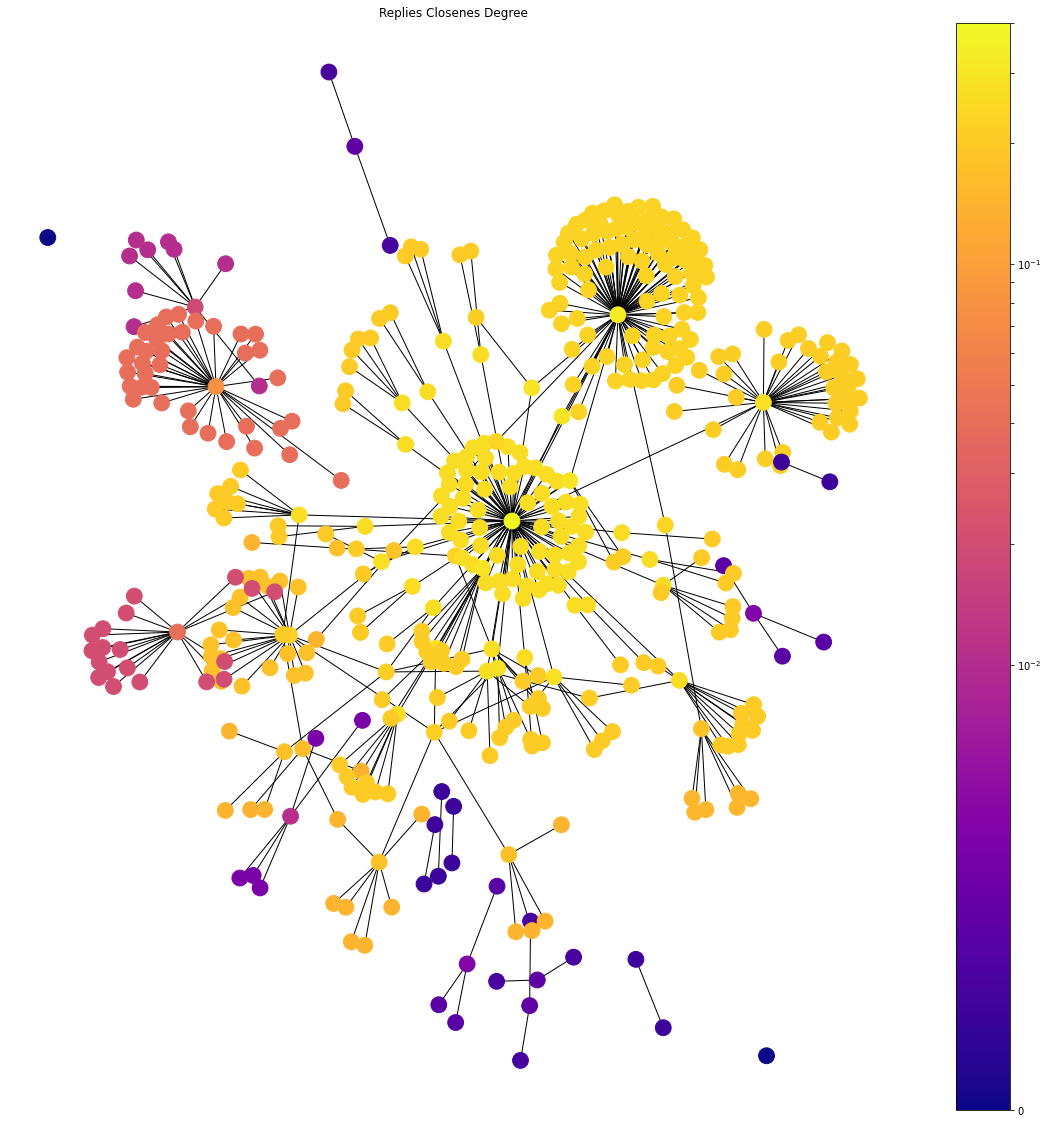

In [120]:
closenes = nx.closeness_centrality(F)
print(closenes)
draw(F, nx.spring_layout(F, k=0.05, iterations=20), 
     closenes, 'Replies Closenes Degree', './infojakarta/replies_closenes.png')

In [115]:
between = nx.betweenness_centrality(F)
printbetween
draw(F, nx.spring_layout(F, k=0.05, iterations=20), 
     between, 'Replies Betweenes', './infojakarta/replies_between.png')

{'infojakarta': 0.5157795693698248,
 'arie_16': 0.035419407521662206,
 'teyeng37': 0.0,
 'maxgirl13': 0.0,
 'babyoil008': 0.013228689379848477,
 'christofer_bhp': 0.028140928012996468,
 'rinihaphap': 0.0,
 'okkyjoeamstrong': 0.006632491040239531,
 'vinaagy': 0.0,
 'babangbetawie': 0.0,
 'agus1892': 0.0,
 'withonewithyou': 0.019274232398580397,
 'devicut': 0.0,
 'febri_aku': 0.0,
 'diiiaaannnp': 0.0,
 'andreassgs': 0.0,
 'bintceo': 0.0,
 'wibowolukito': 0.0,
 'prasthialdrii': 0.0,
 'herry28290': 0.0,
 'misterclown8': 0.0,
 'iamcakekhe': 0.023054938075579547,
 'minie_centil': 0.0,
 'cheflatarissa': 0.006632491040239531,
 'sanyseptian': 0.0033207821076985887,
 'srasyh': 0.0,
 'separuhakuongol': 0.0,
 'doni_anakdario': 0.0,
 '___rilwan': 0.00784602821757478,
 'kebsibeb': 0.0,
 'mfp981': 0.0,
 'gitc_seragam': 0.0,
 'agskprmn': 0.006632491040239531,
 'meuthiaariefia1': 0.009935126797622828,
 'arfannn1': 0.01927423239858039,
 'febronie75': 0.0,
 'bayuepe': 0.0,
 'alegiggsy': 0.027648092580950

In [118]:
eigen = nx.eigenvector_centrality(F)
eigen

{'infojakarta': 0.5118807922625793,
 'arie_16': 0.05438122168599615,
 'teyeng37': 0.04598147333215807,
 'maxgirl13': 0.04598147333215807,
 'babyoil008': 0.052377052998588525,
 'christofer_bhp': 0.05654556455295518,
 'rinihaphap': 0.04598147333215807,
 'okkyjoeamstrong': 0.051431563176983136,
 'vinaagy': 0.04598147333215807,
 'babangbetawie': 0.04598147333215807,
 'agus1892': 0.04598147333215807,
 'withonewithyou': 0.053004597476310276,
 'devicut': 0.04598147333215807,
 'febri_aku': 0.04598147333215807,
 'diiiaaannnp': 0.04598147333215807,
 'andreassgs': 0.04598147333215807,
 'bintceo': 0.04598147333215807,
 'wibowolukito': 0.04598147333215807,
 'prasthialdrii': 0.04598147333215807,
 'herry28290': 0.04598147333215807,
 'misterclown8': 0.04598147333215807,
 'iamcakekhe': 0.05386231920792408,
 'minie_centil': 0.04598147333215807,
 'cheflatarissa': 0.051431563176983136,
 'sanyseptian': 0.05097150497044865,
 'srasyh': 0.04598147333215807,
 'separuhakuongol': 0.04598147333215807,
 'doni_anak

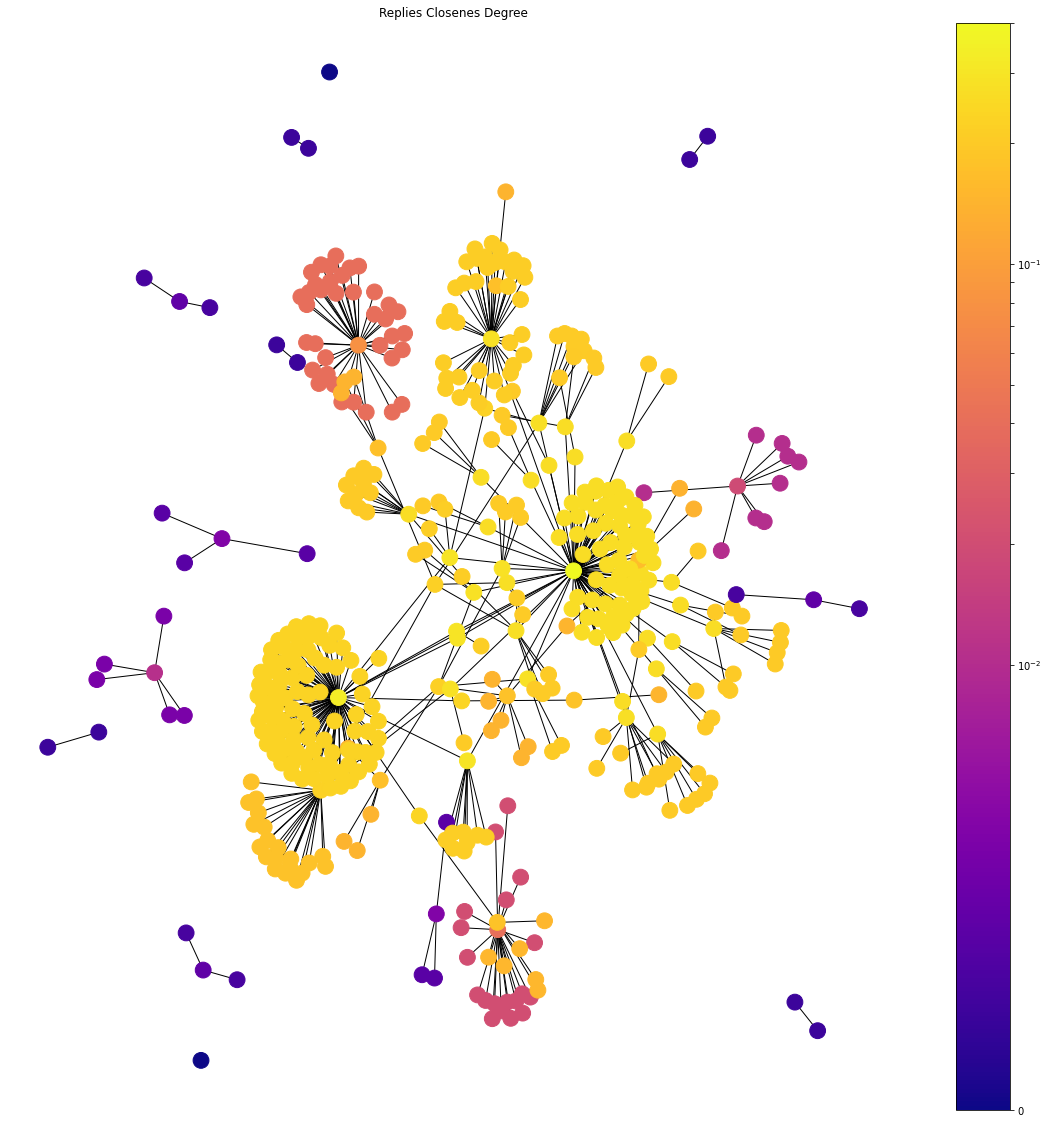